## Problem Statement 

Prepare solution to build ticketing system there by using json file as your primary datasource 
(Text corpus with other metadata in it).

Step 1: Group data into five categories namely Banking services, loans, Fraudalent reporting, Card, others.
    
Step 2: From step 1 create labeled dataset and utilize it to train supervised model like logistic regression, decision tree or random forest.
    

Above excercise should follow these steps -
EDA
Feature Extraction
Topic Modelling (Unsupervised)
Model building using Supervised learning
Model Training and evaluation
Inference  

## Importing libraries

In [83]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import itertools

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashutosh_lande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashutosh_lande\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashutosh_lande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading the data reading data


In [84]:
#Read the data from Json

file_path = 'client_data.json'

data1= open(file_path)
data =json.load(data1)
df = pd.json_normalize(data)
df.head(10)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


## Inspecting Data 

In [85]:
# print the column names

df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [86]:
# Renaming columns

df.rename(columns=lambda x: x.replace('_source.', ''), inplace=True)
df.rename(columns=lambda x: x.strip('_'), inplace=True)

df.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [87]:
## Create a Copy for Exploratory Data Analysis

df_eda = df.copy(deep=True)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      78313 non-null  object 
 1   type                       78313 non-null  object 
 2   id                         78313 non-null  object 
 3   score                      78313 non-null  float64
 4   tags                       10900 non-null  object 
 5   zip_code                   71556 non-null  object 
 6   complaint_id               78313 non-null  object 
 7   issue                      78313 non-null  object 
 8   date_received              78313 non-null  object 
 9   state                      76322 non-null  object 
 10  consumer_disputed          78313 non-null  object 
 11  product                    78313 non-null  object 
 12  company_response           78313 non-null  object 
 13  company                    78313 non-null  obj

In [88]:
# Reassign Naan=blank in the complaints column

df_eda['complaint_what_happened'] = np.where(df_eda['complaint_what_happened'] =='', np.nan, df_eda['complaint_what_happened'])
df_eda['complaint_what_happened']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [89]:
#Removed all rows where complaint col=nan

df_eda= df_eda[~df_eda.complaint_what_happened.isna()]
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21072 entries, 1 to 78312
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      21072 non-null  object 
 1   type                       21072 non-null  object 
 2   id                         21072 non-null  object 
 3   score                      21072 non-null  float64
 4   tags                       3816 non-null   object 
 5   zip_code                   16427 non-null  object 
 6   complaint_id               21072 non-null  object 
 7   issue                      21072 non-null  object 
 8   date_received              21072 non-null  object 
 9   state                      20929 non-null  object 
 10  consumer_disputed          21072 non-null  object 
 11  product                    21072 non-null  object 
 12  company_response           21072 non-null  object 
 13  company                    21072 non-null  obj

## Topic modeling

In [90]:
# Clean the text and remove all the unnecessary elements.

def cleaning(text):
   text = text.lower()
   text = re.sub("\[\s*\w*\s*\]", "", text)
   text = text.translate(str.maketrans('', '', string.punctuation))
   text = re.sub("\S*\d\S*", "", text)

   return text

df_eda.complaint_what_happened = pd.DataFrame(df_eda.complaint_what_happened.apply(lambda x: clean_text(x)))   

In [91]:
pd.set_option('display.max_colwidth', None)
df_eda.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,Problem with rewards from credit card,Consent provided
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,Information belongs to someone else,Consent provided
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,Information belongs to someone else,Consent provided
14,complaint-public-v2,complaint,3224980,0.0,None,920XX,3224980,Managing an account,2019-04-27T12:00:0

In [92]:
# Using Space to Lemmatize the texts and  find the Pos Tags

nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

In [93]:
# Using Lemmatization in the texts

def pos_lemmatize_pipe(doc):
    document_lemma = " ".join([tok.lemma_ for tok in doc])
    document_pos = " ".join([tok.text for tok in doc if tok.pos_ == 'NOUN']) 
    return document_lemma, document_pos

def spacy_pos_lemmatizer(texts):
    return [pos_lemmatize_pipe(doc) for doc in nlp.pipe(texts, batch_size=40, disable=["tok2vec", "parser", "ner"])]
    
df_eda['complaints_lemma'],  df_eda['complaints_pos_tags'] = zip(*spacy_pos_lemmatizer(df_eda.complaint_what_happened))

In [94]:
#The tagging POS

df_clean = df_eda[['complaint_what_happened', 'complaints_lemma','complaints_pos_tags']].copy()

In [95]:
df_clean.head()

,complaint_what_happened,complaints_lemma,complaints_pos_tags
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \n in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thanks in advance for your help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account

## Exploratory data analysis of data

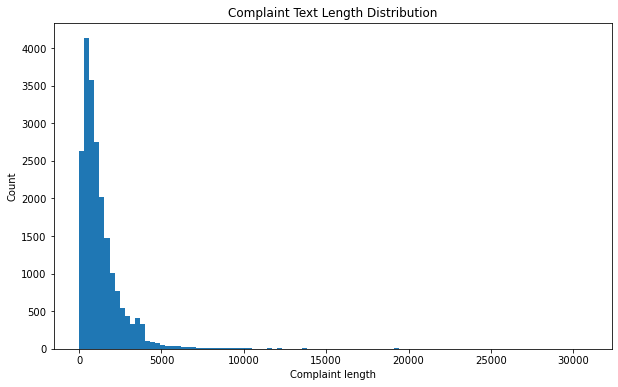

In [96]:
# Let's visualise the data according to the 'Complaint' character length

#Visualization

df_clean['complaint_len'] = df_clean['complaint_what_happened'].astype(str).apply(len)

plt.figure(figsize=(10,6))
df_clean['complaint_len'].plot.hist(bins=100, title='Complaint Text Length Distribution')
plt.xlabel('Complaint length')
plt.ylabel('Count')
plt.show()


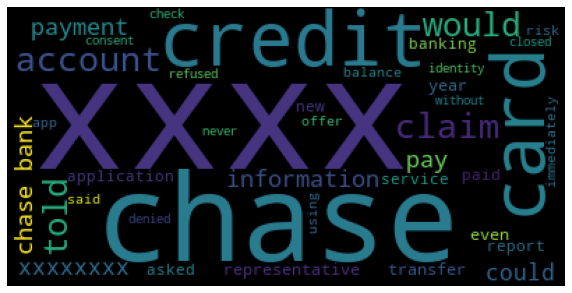

In [97]:
# Using a word cloud find the top 40 words by frequency among all the articles after processing the text

from wordcloud import WordCloud
stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(stopwords=stop_words,max_words=40).generate(str(df_clean.complaint_what_happened))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

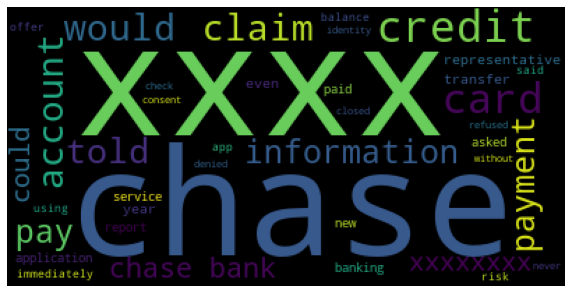

In [98]:
#Using a word cloud find the top 40 words by frequency among all the articles from complaints_pos_tags

from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stop_words,max_words=40).generate(str(df_clean.complaints_pos_tags))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [99]:
#Removing -PRON- from the Spacy lemmatized text corpus

df_clean['complaint_clean'] = df_clean['complaints_lemma'].str.replace('-PRON-', '')

In [100]:
#All -PRON- texts has been removed 
df_clean.head()

,complaint_what_happened,complaints_lemma,complaints_pos_tags,complaint_len,complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \n in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thanks in advance for your help,475,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \n in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thanks in advance for your help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,337,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,210,chase car

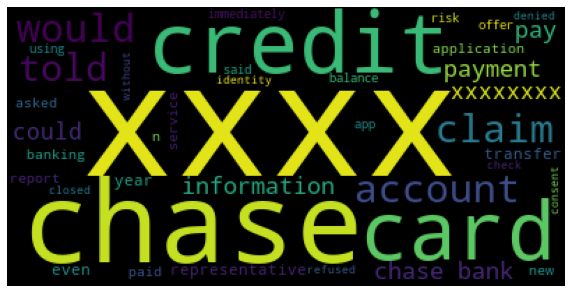

In [101]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text

wordcloud = WordCloud(stopwords=stop_words,max_words=40).generate(str(df_clean.complaint_clean))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [102]:
#Function to return the top 'n' words from corpus for a given 'n_gram_range'

def get_top_n_ngram( corpus, n_gram_range, n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

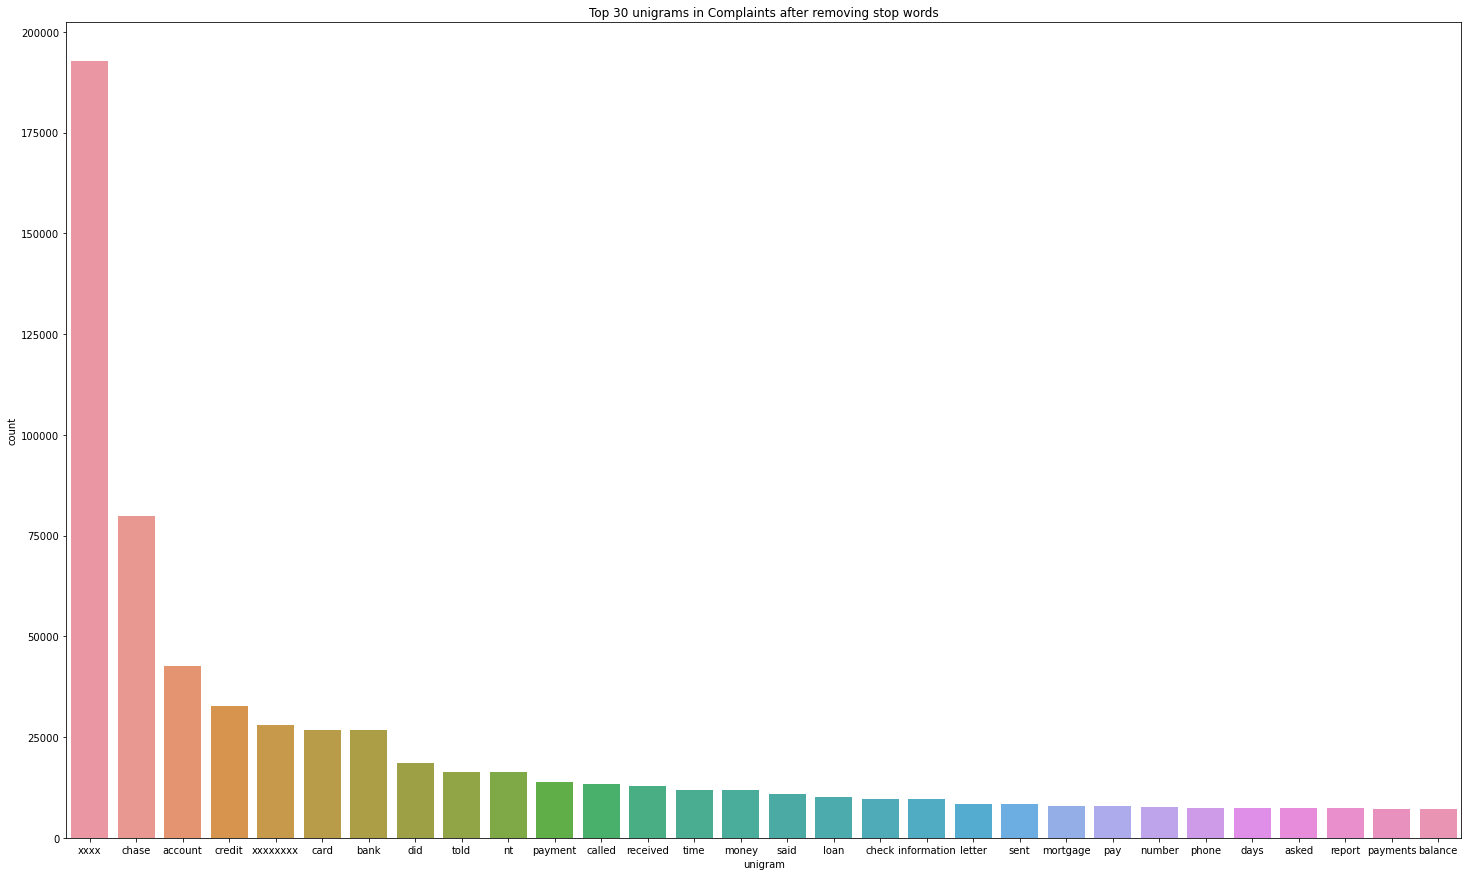

In [103]:
#The top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 

common_words = get_top_n_ngram(df_clean.complaint_clean, 1, 30)
df1 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
plt.figure(figsize=[25,15])
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.title('Top 30 unigrams in Complaints after removing stop words')
plt.show()

In [104]:
#The top 10 words in the unigram frequency
df1.head(10)

,unigram,count
0,xxxx,192695
1,chase,79861
2,account,42591
3,credit,32677
4,xxxxxxxx,27927
5,card,26847
6,bank,26651
7,did,18481
8,told,16380
9,nt,16289


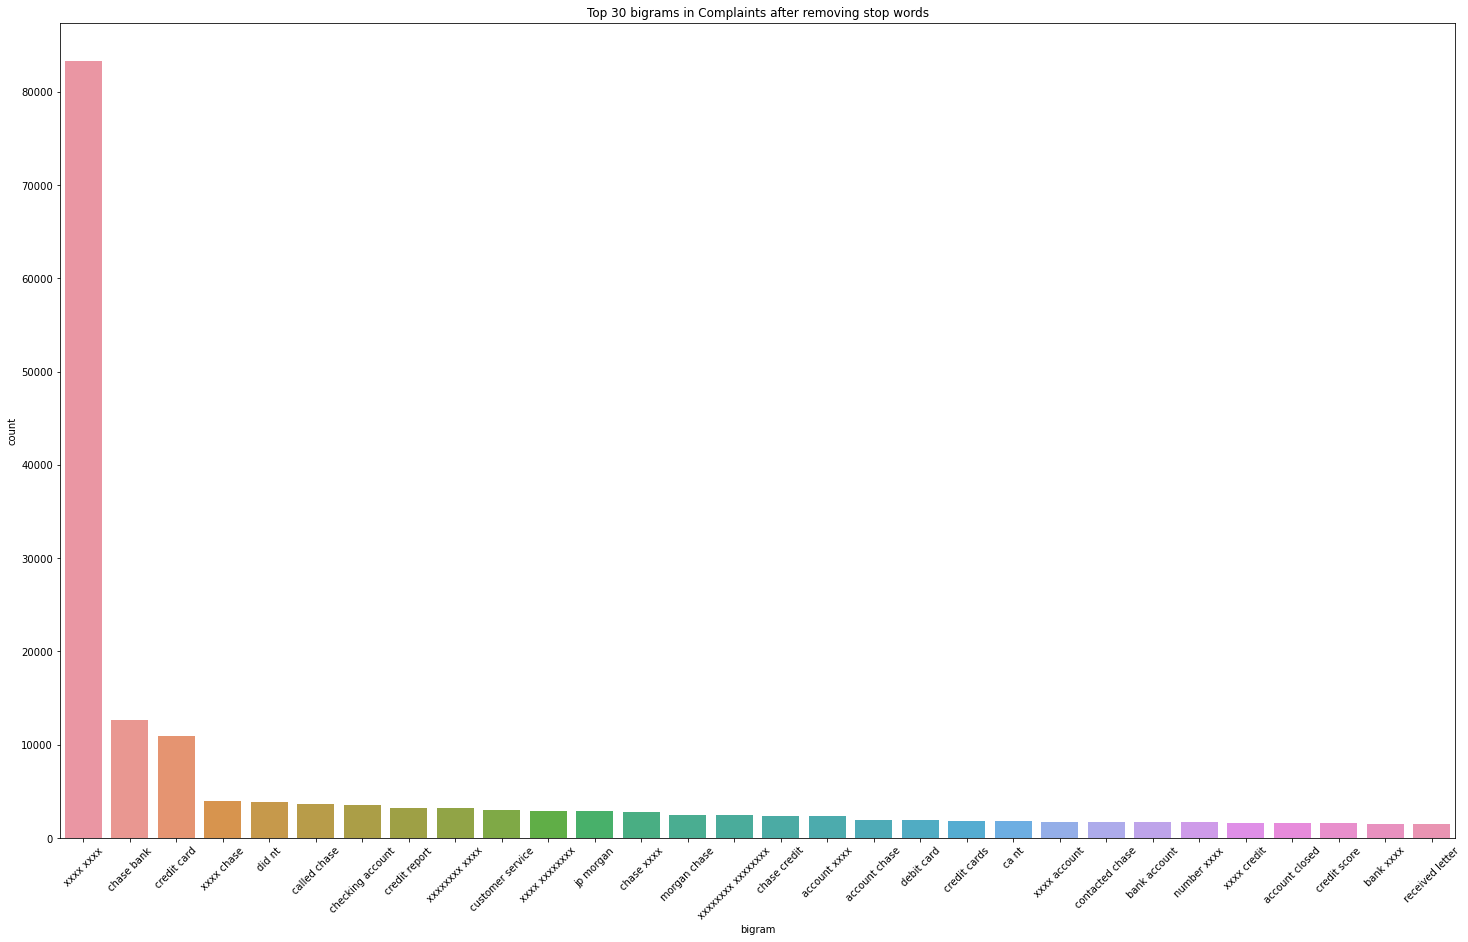

In [105]:
#The top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 

common_words = get_top_n_ngram(df_clean.complaint_clean, 2, 30)
df2 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
plt.figure(figsize=[25,15])
plt.xticks(rotation=45)
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.title('Top 30 bigrams in Complaints after removing stop words')
plt.show()

In [106]:
#Print the top 10 words in the bigram frequency

df2.head(10)

,bigram,count
0,xxxx xxxx,83247
1,chase bank,12609
2,credit card,10905
3,xxxx chase,3945
4,did nt,3837
5,called chase,3688
6,checking account,3551
7,credit report,3237
8,xxxxxxxx xxxx,3206
9,customer service,3014


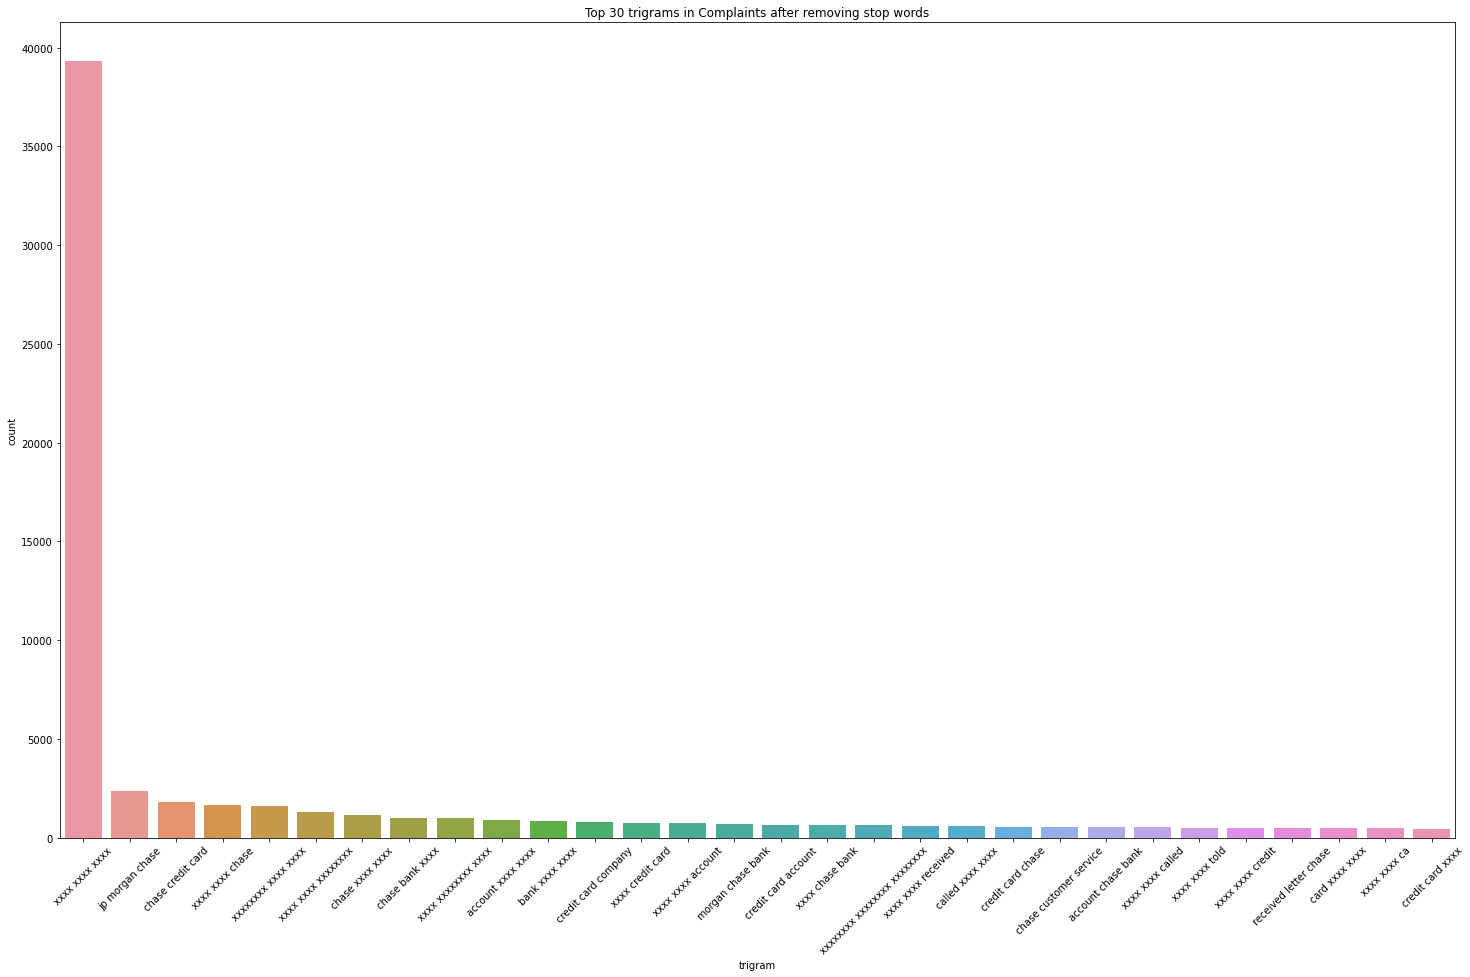

In [107]:
# Write your code here to find the top 30 trigram datafram(df_clean). 

common_words = get_top_n_ngram(df_clean.complaint_clean, 3, 30)
df3 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
plt.figure(figsize=[25,15])
plt.xticks(rotation=45)
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.title('Top 30 trigrams in Complaints after removing stop words')
plt.show()

In [108]:
#Print the top 10 words in the trigram frequency

df3.head(10)

,trigram,count
0,xxxx xxxx xxxx,39319
1,jp morgan chase,2340
2,chase credit card,1810
3,xxxx xxxx chase,1658
4,xxxxxxxx xxxx xxxx,1594
5,xxxx xxxx xxxxxxxx,1293
6,chase xxxx xxxx,1151
7,chase bank xxxx,984
8,xxxx xxxxxxxx xxxx,969
9,account xxxx xxxx,913


In [109]:
df_clean['complaint_clean'] = df_clean['complaint_clean'].str.replace('xxxx','')

In [110]:
#All masked texts has been removed
df_clean.head()

,complaint_what_happened,complaints_lemma,complaints_pos_tags,complaint_len,complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \n in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thanks in advance for your help,475,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services \n in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \n i have a right to know this information as a consumer \n\n chase account thanks in advance for your help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,337,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,210,chase card was reported on however fraudulent application have been submitted

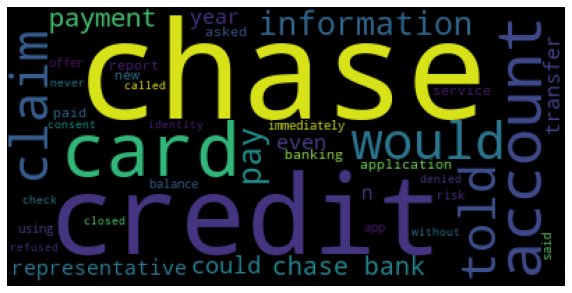

In [111]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text

wordcloud = WordCloud(stopwords=stop_words,max_words=40).generate(str(df_clean.complaint_clean))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

## Feature Extraction


In [112]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.95)

In [113]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.complaint_clean)

## Manual Topic Modeling

Topic Modelling using NMF


In [114]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

In [115]:
W = nmf_model.fit_transform(dtm)
H = nmf_model.components_
len(tfidf.get_feature_names())

C:\Users\ashutosh_lande\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).

C:\Users\ashutosh_lande\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



15678

In [116]:
#Print the Top15 words for each of the topic

words = np.array(tfidf.get_feature_names())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i}' for i in range(num_topics)],
                columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]
topic_words                

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 0,card,chase,charges,charge,dispute,did,called,fraud,received,told,claim,merchant,transaction,nt,said
Topic 1,credit,card,report,inquiry,chase,inquiries,hard,cards,reporting,score,accounts,account,closed,removed,debt
Topic 2,loan,mortgage,chase,home,modification,property,payments,foreclosure,house,bank,years,jp,morgan,sale,rate
Topic 3,account,bank,check,chase,money,funds,checking,closed,deposit,nt,branch,told,accounts,deposited,said
Topic 4,payment,late,payments,balance,paid,pay,fees,fee,month,statement,account,charged,chase,make,monthly



#### `Topic 0` looks to be `Bank account services`
#### `Topic 1` looks to be `Credit card / Prepaid card`
#### `Topic 2` looks to be `Mortgages/loans`
#### `Topic 3` looks to be `Theft/Dispute reporting`
#### `Topic 4` looks to be `Others`

In [117]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

colnames = ["Topic {}".format(i) for i in range(nmf_model.n_components)]
complaintnames = ["Complaint{}".format(i) for i in range(len(df_clean.index))]
df_doc_topic = pd.DataFrame(W, columns=colnames, index=complaintnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_clean['topic_id'] = significant_topic


In [118]:
df_doc_topic

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,dominant_topic
Complaint0,0.008008,0.011476,0.026275,0.021649,0.005040,2
Complaint1,0.012257,0.005041,0.001692,0.005766,0.003130,0
Complaint2,0.009938,0.042755,0.000431,0.000000,0.000000,1
Complaint3,0.022534,0.047120,0.017287,0.017618,0.000000,1
Complaint4,0.002516,0.000000,0.003362,0.066042,0.000210,3
...,...,...,...,...,...,...
Complaint21067,0.020190,0.057946,0.000000,0.000000,0.022419,1
Complaint21068,0.043358,0.002405,0.003753,0.002618,0.001108,0
Complaint21069,0.023774,0.007589,0.007083,0.015947,0.000000,0
Complaint21070,0.021138,0.026607,0.004262,0.000000,0.088647,4


In [119]:
# Here we are assigning topic starting from 0, 1,2,3 & 4

W = pd.DataFrame(W, columns=[f'Topic {i}' for i in range(num_topics)], index=[f'Complaint{i}' for i in range(W.shape[0])])
W['max_topic'] = W.apply(lambda x: x.idxmax(), axis=1)
W[pd.notnull(W['max_topic'])].head(10)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,max_topic
Complaint0,0.008008,0.011476,0.026275,0.021649,0.005040,Topic 2
Complaint1,0.012257,0.005041,0.001692,0.005766,0.003130,Topic 0
Complaint2,0.009938,0.042755,0.000431,0.000000,0.000000,Topic 1
Complaint3,0.022534,0.047120,0.017287,0.017618,0.000000,Topic 1
Complaint4,0.002516,0.000000,0.003362,0.066042,0.000210,Topic 3
Complaint5,0.000000,0.042878,0.000000,0.000000,0.000000,Topic 1
Complaint6,0.001890,0.000195,0.009210,0.060690,0.017296,Topic 3
Complaint7,0.013067,0.000000,0.033115,0.000000,0.042778,Topic 4
Complaint8,0.057139,0.000000,0.011132,0.016618,0.000154,Topic 0
Complaint9,0.005468,0.093523,0.000000,0.000000,0.000000,Topic 1


In [120]:
#Assign the best topic to each of the complaints in Topic Column

df_clean['Topic'] = W.max_topic.values

In [121]:
df_clean.head()

,complaint_what_happened,complaints_lemma,complaints_pos_tags,complaint_len,complaint_clean,topic_id,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \n in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thanks in advance for your help,475,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services \n in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \n i have a right to know this information as a consumer \n\n chase account thanks in advance for your help,2,Topic 2
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,337,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,0,Topic 0
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,210,chase card was reported on however fraudul

In [122]:
#Print the first 5 Complaint for each of the Topics
df_clean_group=df_clean.groupby('Topic').head(5)
df_clean_group.sort_values('Topic')

,complaint_what_happened,complaints_lemma,complaints_pos_tags,complaint_len,complaint_clean,topic_id,Topic
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,337,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,0,Topic 0
21,on xxxx i made a payment to an online retailer using chase quick pay with xxxx on the chase website i realized that this was a scam website after no confirmation product or response to any inquiries regarding the order and contacted chase to get more information about the transaction to attempt getting a refund through the retailers bank \n\ni contacted chase via a secured message on explaining what happened and asked is there a way to reverse this transaction or do you have a contact at xxxx that can give me more information about the recipient that xxxx my message was reviewed and i received a response restating my original email and informing me that the transfer has been completed however as you mentioned that the website is a scam while we can handle most inquiries by email some require the expertise of another team in order to assist you better in regards to the refund we request you to call our consumer online technical support team i called the number listed in the email and explained my situation to then be transferred to the claims department i was directed to call xxxx and ask them about the transaction because chase did not have any information outside of what i provided when initiating the transfer i felt like this agent was trying to get me to end the call as quickly as possible and i had to interrupt her closing script to ask for a contact number at xxxx and didnt have an opportunity to get any information about what the right questions would be to ask xxxx or what words and phrases i should use to get the information i was looking for \n\ni called xxxx whos automated system initially directed me to call my bank because i used the banks app to initiate the transaction i called xxxx again to navigate their menus and talk to a customer service agent they told me that all of the information about the transaction would in chase s system because i used the banks app to perform the transaction she stayed on the line with me until i understood everything that i should ask and had a better understanding of the situation i ended the call and called chase again \n\nwhen i called chase the second time the agent tried to look up the information about the receiving bank but could not find any additional information she then asked me why i needed this information and i explained my situation again i was once again transferred to the claims department who told me that i needed to contact xxxx to get the information i was looking for after i told her that i had already contacted them she finally admitted that there was nothing 

In [123]:
#Create the dictionary of Topic names and Topics

Topic_names = {
    'Topic 0': 'Bank account services',
    'Topic 1': 'Credit card / Prepaid card',
    'Topic 2': 'Mortgages/loans',
    'Topic 3': 'Theft/Dispute reporting',
    'Topic 4': 'Others'   
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [124]:
df_clean.head()

,complaint_what_happened,complaints_lemma,complaints_pos_tags,complaint_len,complaint_clean,topic_id,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \n in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thanks in advance for your help,475,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services \n in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \n i have a right to know this information as a consumer \n\n chase account thanks in advance for your help,2,Mortgages/loans
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,337,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,0,Bank account services
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,210,chase card was repor

## Supervised model to predict any new complaints 


In [125]:
#Keep the columns"complaint_what_happened" & "topic_id" only in the new dataframe --> training_data

training_data=df_clean[['complaint_what_happened', 'topic_id']]

In [126]:
training_data.head()

,complaint_what_happened,topic_id
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,2
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,0
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,1
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,1
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,3


In [127]:
# Split into train, validation 80%,20% respectively

X_train_complaint, X_test_complaint, y_train, y_test = train_test_split(training_data.complaint_what_happened, training_data.topic_id , train_size=0.8, random_state=40)


In [128]:
#Get the Vector count
# We will be doing fit_transform  on train dataset and  transform on the  test data set 
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train_complaint)
X_test = count_vect.transform(X_test_complaint)

#Transform the word vector to tf-idf
# We will be doing fit_transform  on train dataset and  transform on the  test data set 
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)


In [129]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16857, 30014) (16857,)
(4215, 30014) (4215,)


We will create models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes 



In [130]:
# This function plots the confusion matrix.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [131]:
## For y_true and y_pred display the Classification Metrics and plot Confusion Matrix
def computeClassificationMetrics(y_test,y_test_pred, plot=True):
        print('*'*20+"Classification Report"+'*'*20)
        print(classification_report(y_test,y_test_pred))
        
        if plot:
            # Compute confusion matrix
            cnf_matrix = confusion_matrix(y_test, y_test_pred)
            print('*'*20+'Confusion Matrix'+'*'*20)
            # Plot non-normalized confusion matrix
            class_names = [0,1,2,3,4]
            plt.figure(figsize=(7,5))
            plot_confusion_matrix(cnf_matrix
                      , classes=class_names)                      
            plt.show()
      

In [132]:
##Function for training models and testing on a test set. if plot is True, it plots a PRC curve for 
##training and test sets and finds the threshold where (precision*recall) is maximum.
def model_fit(alg, X_train_data, y_train_data, X_test_data, y_test_data, plot=True):
    
    #Fit the algorithm on the data
    alg.fit(X_train_data, y_train_data)
        
    #Predict training set:
    y_train_pred = alg.predict(X_train_data)
    #Predict validation set:
    y_test_pred = alg.predict(X_test_data)
      
    computeClassificationMetrics(y_test_data, y_test_pred, plot)
    

In [133]:
#Using Decision Trees
dt = DecisionTreeClassifier(max_depth=8, random_state=40)

********************Classification Report********************
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       930
           1       0.79      0.77      0.78       877
           2       0.89      0.73      0.81       759
           3       0.78      0.81      0.80      1101
           4       0.78      0.62      0.69       548

    accuracy                           0.76      4215
   macro avg       0.77      0.74      0.75      4215
weighted avg       0.77      0.76      0.76      4215

********************Confusion Matrix********************


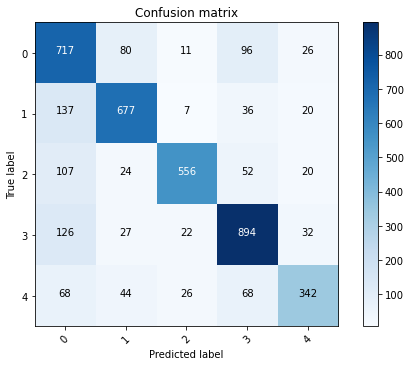

In [134]:
#Model fit on train and validate data
model_fit(dt,X_train, y_train, X_test, y_test ,True)

In [135]:
# Using Random Forest Model :
rfc = RandomForestClassifier(random_state=40)

********************Classification Report********************
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       930
           1       0.83      0.87      0.85       877
           2       0.90      0.86      0.88       759
           3       0.79      0.94      0.86      1101
           4       0.92      0.55      0.69       548

    accuracy                           0.83      4215
   macro avg       0.85      0.81      0.82      4215
weighted avg       0.84      0.83      0.83      4215

********************Confusion Matrix********************


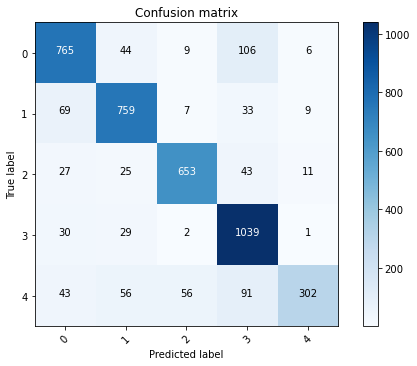

In [136]:
#Model fit on train and validate data
model_fit(rfc,X_train, y_train, X_test, y_test ,True)

In [137]:
# Using multinomial Naive Bayes classifier
mnb = MultinomialNB()

********************Classification Report********************
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       930
           1       0.81      0.67      0.73       877
           2       0.88      0.76      0.82       759
           3       0.56      0.96      0.71      1101
           4       0.97      0.12      0.22       548

    accuracy                           0.70      4215
   macro avg       0.80      0.65      0.64      4215
weighted avg       0.77      0.70      0.68      4215

********************Confusion Matrix********************


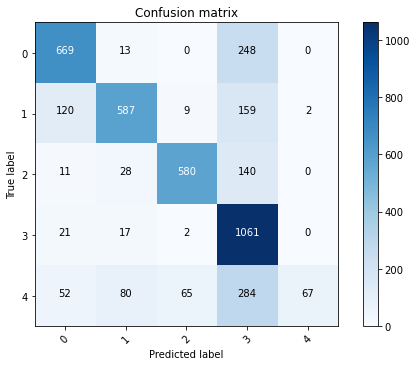

In [138]:
#Model fit on train and test data
model_fit(mnb,X_train, y_train, X_test, y_test ,True)

In [139]:
# Basic Logistic Regression
logreg = LogisticRegression(random_state = 42, max_iter=400)


********************Classification Report********************
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       930
           1       0.96      0.96      0.96       877
           2       0.97      0.96      0.96       759
           3       0.95      0.98      0.96      1101
           4       0.98      0.88      0.93       548

    accuracy                           0.95      4215
   macro avg       0.96      0.95      0.95      4215
weighted avg       0.95      0.95      0.95      4215

********************Confusion Matrix********************


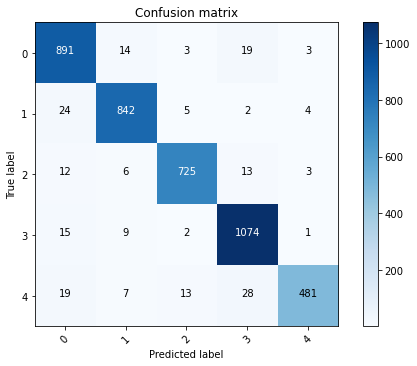

In [140]:
#Model fit on train and test data
model_fit(logreg,X_train, y_train, X_test, y_test ,True)

#### Training Summary ####



| Model | Precision | Recall | F Value | Accuracy | Remarks |
| --- | ----------- | ------ | --------| --------| --------|
| Logistic Regression | 0.94 | 0.94 | 0.94 | 0.94| Baseline Model |
| Decision Tree | 0.75 | 0.74 | 0.74 | 0.74 | Baseline Model | 
| Random Forest | 0.84 |0.83|0.83|0.83 | Baseline Model|
| Naive Bayes | 0.78 |0.72 |0.69 |0.72| Baseline Model|


Based on the above result, we can see that the **Logistic Regression** model gives a good balance between Precision and Recall, and also Accuracy Scores are very good. 

## Model inference

In [141]:
#Custom text to predict the Topic

Test_ses ='I have applied for loan. But Its Still not approved, please do Needfull'


In [142]:
#Only transform using the existing count_vect
custom_txt_X = count_vect.transform([Test_ses])

In [143]:
#Only transform using the existing tfidf_transformer
custom_txt_tfidf = tfidf_transformer.transform(custom_txt_X)


In [144]:
#Predict the topic using logistic regression
y_Test_ses_topic_pred = logreg.predict(custom_txt_tfidf)

### The model has predicted 2 which is `Mortgages/loans`

In [145]:
print(y_Test_ses_topic_pred)

[2]
